## Spatial Statistics
#### Assignment 2
###### Prepared by: Carla Mae Arellano (https://github.com/cmmarellano)
###### Date: 05.04.2022 <br><br>

# Part 1: Data Exploration R

#### ---------------------------------------------------------------------------- 
##  Loading the data

In [40]:
library(tidyverse)
library(dplyr)

options(readr.num_columns = 0)
fao_data <- readr::read_csv("C:/Users/Arellano/JUPYTER/Production_Crops_Livestock_E_Europe/Production_Crops_Livestock_E_Europe.csv")
print(fao_data)


# A tibble: 15,993 x 127
   `Area Code` Area  `Item Code` Item  `Element Code` Element Unit  Y1961 Y1961F
         <dbl> <chr>       <dbl> <chr>          <dbl> <chr>   <chr> <dbl> <chr> 
 1           3 Alba~         515 Appl~           5312 Area h~ ha       NA M     
 2           3 Alba~         515 Appl~           5419 Yield   hg/ha    NA NA    
 3           3 Alba~         515 Appl~           5510 Produc~ tonn~ 10004 NA    
 4           3 Alba~         526 Apri~           5312 Area h~ ha       NA M     
 5           3 Alba~         526 Apri~           5419 Yield   hg/ha    NA NA    
 6           3 Alba~         526 Apri~           5510 Produc~ tonn~   900 F     
 7           3 Alba~        1107 Asses           5111 Stocks  Head  57100 NA    
 8           3 Alba~          44 Barl~           5312 Area h~ ha     8734 NA    
 9           3 Alba~          44 Barl~           5419 Yield   hg/ha 10224 Fc    
10           3 Alba~          44 Barl~           5510 Produc~ tonn~  8930 NA    
# .


Here are the initial observation of the dataset
- a list
- a table with size 15,993 x 127
- 127 columns


##### Inspecting further, we find that the dataset contain information for:
- period of __1961 to 2020__ 
- for __45 countries__ 
- __255 unique items__  (i.e. Apples, Cattle,..)
- __18 element codes__ (ie. Area harvested,Yield, Production, Stocks)
- __9 elements__ (ie. Area harvested, Yield, Production, Stocks )
- __12 unique units__ , depending on the element  (ie. 'ha' 'hg/ha' 'tonnes' 'Head' 'No' '1000 Head')

<br>
<br>
Below lists the details (data types, len, and/or statistics) of every column, and the derivation of other pertinent information. 

<br>
<br>

In [13]:
summary(fao_data)

   Area Code         Area             Item Code        Item          
 Min.   :  3.0   Length:15993       Min.   :  15   Length:15993      
 1st Qu.: 79.0   Class :character   1st Qu.: 339   Class :character  
 Median :146.0   Mode  :character   Median : 549   Mode  :character  
 Mean   :140.4                      Mean   : 721                     
 3rd Qu.:199.0                      3rd Qu.:1034                     
 Max.   :273.0                      Max.   :2029                     
                                                                     
  Element Code    Element              Unit               Y1961          
 Min.   :5111   Length:15993       Length:15993       Min.   :        0  
 1st Qu.:5312   Class :character   Class :character   1st Qu.:     4181  
 Median :5419   Mode  :character   Mode  :character   Median :    25200  
 Mean   :5412                                         Mean   :   798677  
 3rd Qu.:5510                                         3rd Qu.:   16671

In [10]:
spec(fao_data)

cols(
  `Area Code` = col_double(),
  Area = col_character(),
  `Item Code` = col_double(),
  Item = col_character(),
  `Element Code` = col_double(),
  Element = col_character(),
  Unit = col_character(),
  Y1961 = col_double(),
  Y1961F = col_character(),
  Y1962 = col_double(),
  Y1962F = col_character(),
  Y1963 = col_double(),
  Y1963F = col_character(),
  Y1964 = col_double(),
  Y1964F = col_character(),
  Y1965 = col_double(),
  Y1965F = col_character(),
  Y1966 = col_double(),
  Y1966F = col_character(),
  Y1967 = col_double(),
  Y1967F = col_character(),
  Y1968 = col_double(),
  Y1968F = col_character(),
  Y1969 = col_double(),
  Y1969F = col_character(),
  Y1970 = col_double(),
  Y1970F = col_character(),
  Y1971 = col_double(),
  Y1971F = col_character(),
  Y1972 = col_double(),
  Y1972F = col_character(),
  Y1973 = col_double(),
  Y1973F = col_character(),
  Y1974 = col_double(),
  Y1974F = col_character(),
  Y1975 = col_double(),
  Y1975F = col_character(),
  Y1976 = col_

In [12]:
print(typeof(fao_data))

[1] "list"


In [16]:
n_distinct(fao_data[1]) #unique Area Code

[1] 45

In [27]:
n_distinct(fao_data[2]) #unique Area; should be same as Area Code
unique(fao_data[2])     #list of countries

[1] 45

Area
Albania
Austria
Belarus
Belgium
Belgium-Luxembourg
Bosnia and Herzegovina
Bulgaria
Croatia
Czechia
Czechoslovakia


In [26]:
n_distinct(fao_data[3]) #unique Item Code
n_distinct(fao_data[4]) #unique Item
unique(fao_data[4])     #list of unique Items

[1] 255

[1] 255

Item
Apples
Apricots
Asses
Barley
"Beans, dry"
"Beans, green"
Beehives
Beer of barley
Beeswax
"Broad beans, horse beans, dry"


In [41]:
n_distinct(fao_data[5]) #unique Element Code


[1] 18

In [25]:
n_distinct(fao_data[6]) #unique Element 
unique(fao_data[6])

[1] 9

Element
Area harvested
Yield
Production
Stocks
Prod Popultn
Laying
Producing Animals/Slaughtered
Yield/Carcass Weight
Milk Animals


In [29]:
n_distinct(fao_data$Unit) #unique Units used
unique(fao_data$Unit)

[1] 12

[1] "ha"        "hg/ha"     "tonnes"    "Head"      "No"        "1000 Head"
 [7] "100mg/An"  "No/An"     "1000 No"   "hg/An"     "hg"        "0.1g/An"

#### ---------------------------------------------------------------------------- 
##  Top 15 Ukrainian agricultural production items in 2020


<br>
Parameters

- Ukraine
- agricultural production items
- 2020
- tonnes

In [52]:
library(knitr)

names(fao_data) <- make.names(names(fao_data))

fao_data %>%
    dplyr::select(Area, Item.Code, Item, Element.Code, Element, Unit, Y2020, Y2020F) %>%
    dplyr::filter(Area == "Ukraine") %>%
    dplyr::filter(Element == "Production") %>%
    dplyr::arrange(-Y2020) %>%
    knitr::kable()
    



|Area    | Item.Code|Item                                 | Element.Code|Element    |Unit    |    Y2020|Y2020F |
|:-------|---------:|:------------------------------------|------------:|:----------|:-------|--------:|:------|
|Ukraine |      1717|Cereals, Total                       |         5510|Production |tonnes  | 64342357|A      |
|Ukraine |        56|Maize                                |         5510|Production |tonnes  | 30290340|NA     |
|Ukraine |        15|Wheat                                |         5510|Production |tonnes  | 24912350|NA     |
|Ukraine |       116|Potatoes                             |         5510|Production |tonnes  | 20837990|NA     |
|Ukraine |      1720|Roots and Tubers, Total              |         5510|Production |tonnes  | 20837990|A      |
|Ukraine |      1062|Eggs, hen, in shell                  |         5513|Production |1000 No | 16005800|NA     |
|Ukraine |       267|Sunflower seed                       |         5510|Production |tonnes  |

<br><br>
Simplifying the table to present the __top 15__ Production items of Ukraine
<br>
<br>

In [54]:
fao_data %>%
    dplyr::select(Area, Item.Code, Item, Element, Unit, Y2020, Y2020F) %>%
    dplyr::filter(Area == "Ukraine") %>%
    dplyr::filter(Element == "Production") %>%
    dplyr::arrange(-Y2020) %>%
    dplyr::filter(Unit == "tonnes") %>%
    dplyr::slice_head(n=15) %>%
    knitr::kable()



|Area    | Item.Code|Item                      |Element    |Unit   |    Y2020|Y2020F |
|:-------|---------:|:-------------------------|:----------|:------|--------:|:------|
|Ukraine |      1717|Cereals, Total            |Production |tonnes | 64342357|A      |
|Ukraine |        56|Maize                     |Production |tonnes | 30290340|NA     |
|Ukraine |        15|Wheat                     |Production |tonnes | 24912350|NA     |
|Ukraine |       116|Potatoes                  |Production |tonnes | 20837990|NA     |
|Ukraine |      1720|Roots and Tubers, Total   |Production |tonnes | 20837990|A      |
|Ukraine |       267|Sunflower seed            |Production |tonnes | 13110430|NA     |
|Ukraine |      1841|Oilcrops, Cake Equivalent |Production |tonnes |  9933301|A      |
|Ukraine |      1735|Vegetables Primary        |Production |tonnes |  9675389|A      |
|Ukraine |      1780|Milk, Total               |Production |tonnes |  9263879|A      |
|Ukraine |       157|Sugar beet          

#### ---------------------------------------------------------------------------- 
##  Histogram of one of the Top 5 Ukrainian production items - National Assessment 
<br>
<br>



The top 5 Ukrainian production items are:
1. Cereals
2. Maize
3. Wheat
4. Potatoes
5. Roots and Tubers.

In [55]:
fao_data %>%
    dplyr::select(Area, Item.Code, Item, Element, Unit, Y2020, Y2020F) %>%
    dplyr::filter(Area == "Ukraine") %>%
    dplyr::filter(Element == "Production") %>%
    dplyr::arrange(-Y2020) %>%
    dplyr::filter(Unit == "tonnes") %>%
    dplyr::slice_head(n=5) %>%
    knitr::kable()



|Area    | Item.Code|Item                    |Element    |Unit   |    Y2020|Y2020F |
|:-------|---------:|:-----------------------|:----------|:------|--------:|:------|
|Ukraine |      1717|Cereals, Total          |Production |tonnes | 64342357|A      |
|Ukraine |        56|Maize                   |Production |tonnes | 30290340|NA     |
|Ukraine |        15|Wheat                   |Production |tonnes | 24912350|NA     |
|Ukraine |       116|Potatoes                |Production |tonnes | 20837990|NA     |
|Ukraine |      1720|Roots and Tubers, Total |Production |tonnes | 20837990|A      |

For this part, we would be analyzing the national production in tons of:  __Potatoes__


In [57]:
fao_data %>%
    dplyr::select(Area, Item.Code, Item, Element, Unit, Y2020, Y2020F) %>%
    #dplyr::filter(Area == "Ukraine") %>%
    dplyr::filter(Element == "Production") %>%
    dplyr::arrange(-Y2020) %>%
    dplyr::filter(Unit == "tonnes") %>%
    dplyr::filter(Item.Code == "116") %>%
    #dplyr::slice_head(n=5) %>%
    knitr::kable()



|Area                                                 | Item.Code|Item     |Element    |Unit   |    Y2020|Y2020F |
|:----------------------------------------------------|---------:|:--------|:----------|:------|--------:|:------|
|Ukraine                                              |       116|Potatoes |Production |tonnes | 20837990|NA     |
|Russian Federation                                   |       116|Potatoes |Production |tonnes | 19607361|NA     |
|Germany                                              |       116|Potatoes |Production |tonnes | 11715100|NA     |
|France                                               |       116|Potatoes |Production |tonnes |  8691900|NA     |
|Poland                                               |       116|Potatoes |Production |tonnes |  7848600|NA     |
|Netherlands                                          |       116|Potatoes |Production |tonnes |  7020060|NA     |
|United Kingdom of Great Britain and Northern Ireland |       116|Potatoes |Pr

Surprisingly, from the previous table, Ukraine is the __top 1 in the production of Potatoes within Europe__ for 2020.


Taking the global dataset, Ukraine ranks top 3 in the world for the same year. (image below, source: FAO) <br><br>

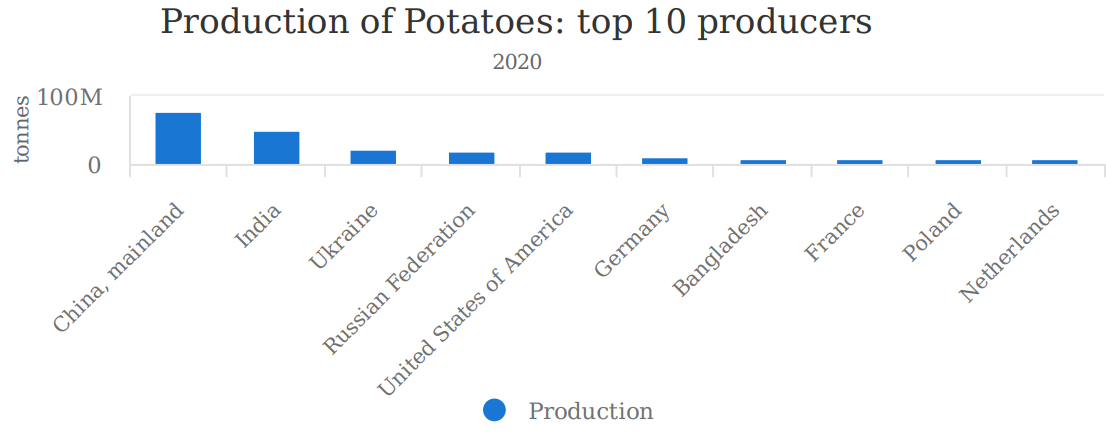





Inspecting the 2020 production of Potatoes further. The Histogram is presented below.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 5 rows containing non-finite values (stat_bin)."

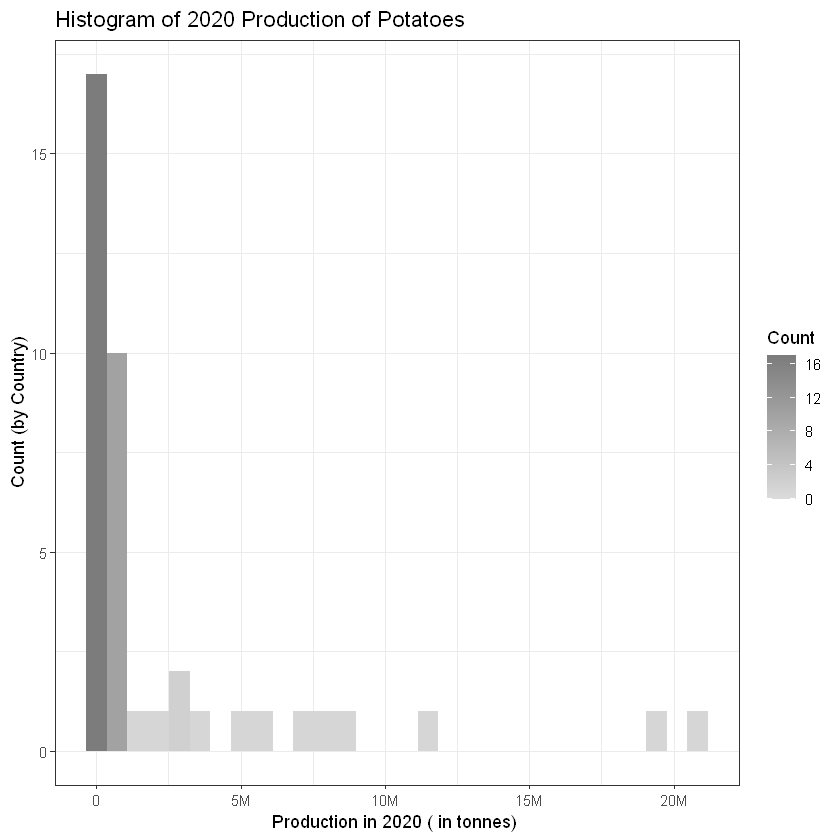

In [109]:
fao_data %>%
        dplyr::select(Area, Item.Code, Item, Element, Unit, Y2020, Y2020F) %>%
        dplyr::filter(Element == "Production") %>%
        dplyr::filter(Unit == "tonnes") %>%
        dplyr::filter(Item.Code == "116") %>%
        #dplyr::slice_head(n=5) %>%
        #knitr::kable() %>%
        ggplot2::ggplot(., aes(x = Y2020, fill=..count..)) +
            ggplot2::geom_histogram() +
            ggplot2::scale_fill_gradient("Count", low="#DCDCDC", high="#7C7C7C")+
            ggplot2::expand_limits(x = c(0, NA), y = c(0,NA)) +
            ggplot2::scale_x_continuous(labels = scales::label_number_si()) +
            ggplot2::ggtitle("Histogram of 2020 Production of Potatoes") +
            ggplot2::labs(x="Production in 2020 ( in tonnes) " ,  y="Count (by Country)") +
            ggplot2::theme_bw() 
    

# Part 2: Interpretation of a QQ-Plot<br>

Data:

#### ---------------------------------------------------------------------------- 
##  Changes in distribution (Kazakhstan)

The QQ Plot shows a negative change from 1995 to 1999 in Kazakhstan. It indicates a decrease in BMI in the span of 4 years.

#### ---------------------------------------------------------------------------- 
##  Change in BMI of underweight and obese people

The pattern of weigh gain differs.

#### ---------------------------------------------------------------------------- 
##  Additional information in the QQ-plot

By using looking at the QQ-plot, we can have a visual check whether our dependent variable is "normally distributed". It allows us to have that assumption before performing further statisticl analysis.